<a href="https://colab.research.google.com/github/Luc1lfer/Luc1lfer-CCDATSCL_EXERCISES_COM221ML/blob/main/CCDATSCL_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [ ]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [ ]:
# Cell 1: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style for better visualizations
sns.set_style("whitegrid")

In [ ]:
# Cell 2: Summary statistics for lead_time
print("LEAD TIME SUMMARY STATISTICS")
print("="*50)
print(df['lead_time'].describe())
print(f"\nSkewness: {df['lead_time'].skew():.3f}")

LEAD TIME SUMMARY STATISTICS
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Skewness: 1.347


In [ ]:
# Cell 3: Summary statistics for adr
print("ADR SUMMARY STATISTICS")
print("="*50)
print(df['adr'].describe())
print(f"\nSkewness: {df['adr'].skew():.3f}")

ADR SUMMARY STATISTICS
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Skewness: 10.530


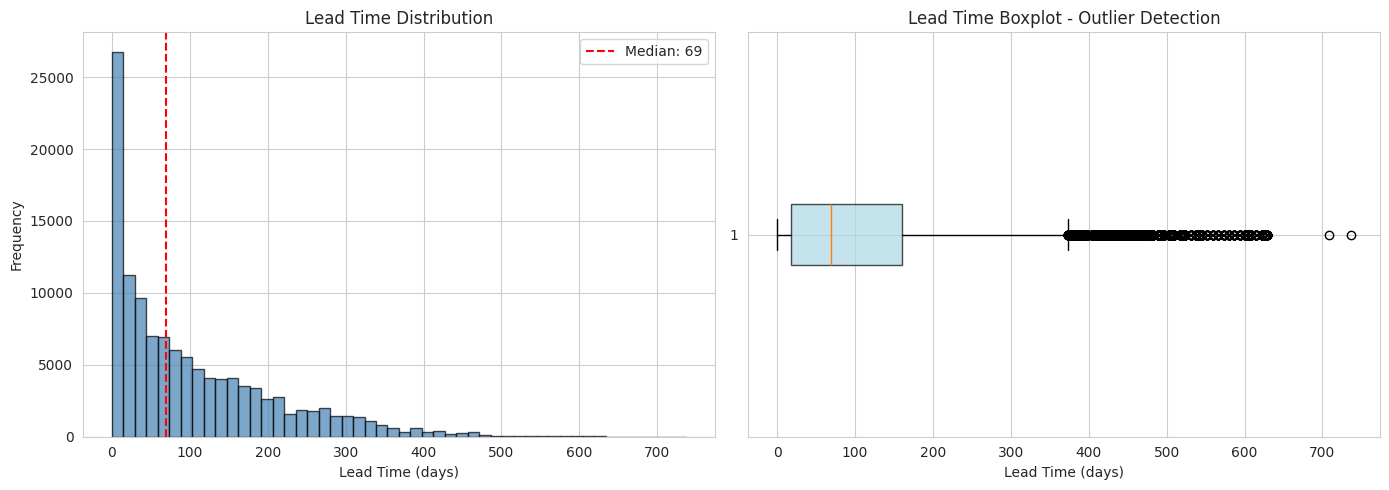

In [ ]:
# Cell 4: Visualize lead_time distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['lead_time'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Lead Time Distribution')
axes[0].axvline(df['lead_time'].median(), color='red', linestyle='--', label=f'Median: {df["lead_time"].median():.0f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['lead_time'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_xlabel('Lead Time (days)')
axes[1].set_title('Lead Time Boxplot - Outlier Detection')

plt.tight_layout()
plt.show()

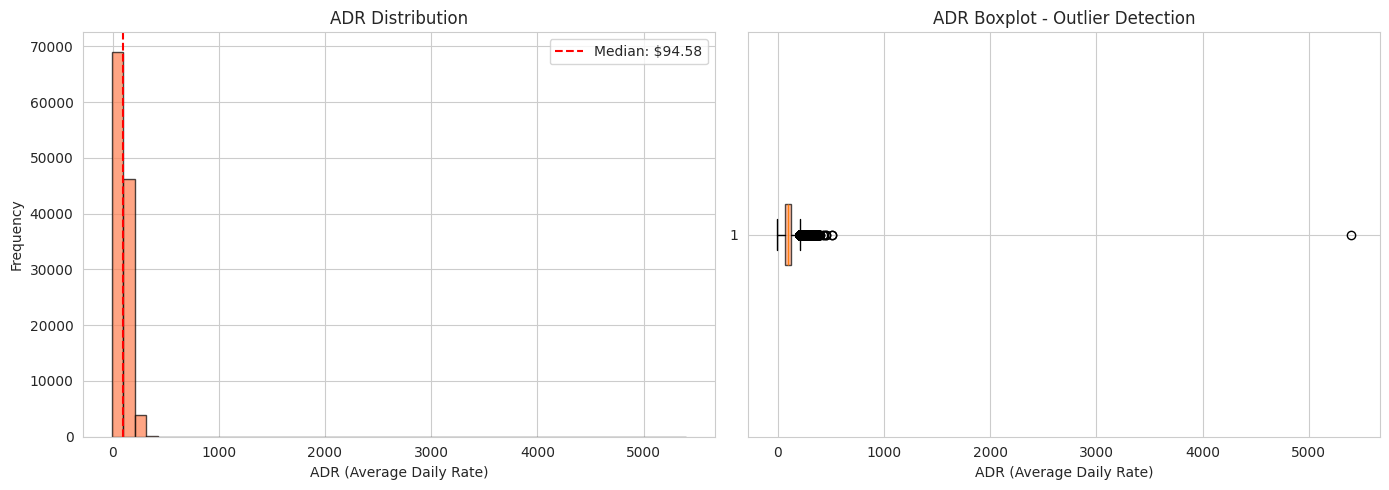

In [ ]:
# Cell 5: Visualize adr distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['adr'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('ADR (Average Daily Rate)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('ADR Distribution')
axes[0].axvline(df['adr'].median(), color='red', linestyle='--', label=f'Median: ${df["adr"].median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['adr'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightsalmon', alpha=0.7))
axes[1].set_xlabel('ADR (Average Daily Rate)')
axes[1].set_title('ADR Boxplot - Outlier Detection')

plt.tight_layout()
plt.show()

## Cell 6: Final interpretation and conclusions

The data shows that lead time is right-skewed, with most customers booking closer to their arrival date (median of 69 days), though some bookings are made far in advance. ADR is also right-skewed, with most bookings around $94.58 and a few high-priced reservations present.

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [ ]:
# put your answer here

# Cell 1: Explore the cancellation variable
print("CANCELLATION VARIABLE OVERVIEW")
print("="*50)
print(df['is_canceled'].value_counts())
print("\nCancellation Rate:")
print(df['is_canceled'].value_counts(normalize=True) * 100)

CANCELLATION VARIABLE OVERVIEW
is_canceled
0    75166
1    44224
Name: count, dtype: int64

Cancellation Rate:
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


In [ ]:
# Cell 2: Summary statistics for lead_time by cancellation status
print("LEAD TIME BY CANCELLATION STATUS")
print("="*50)

# Group by cancellation status
lead_time_by_cancel = df.groupby('is_canceled')['lead_time'].describe()
print(lead_time_by_cancel)

print("\n" + "-"*50)
print("Additional Statistics:")
print("-"*50)
print(f"Median lead time for non-canceled bookings: {df[df['is_canceled']==0]['lead_time'].median():.2f} days")
print(f"Median lead time for canceled bookings: {df[df['is_canceled']==1]['lead_time'].median():.2f} days")
print(f"\nMean lead time for non-canceled bookings: {df[df['is_canceled']==0]['lead_time'].mean():.2f} days")
print(f"Mean lead time for canceled bookings: {df[df['is_canceled']==1]['lead_time'].mean():.2f} days")

LEAD TIME BY CANCELLATION STATUS
               count        mean         std  min   25%    50%    75%    max
is_canceled                                                                 
0            75166.0   79.984687   91.109888  0.0   9.0   45.0  124.0  737.0
1            44224.0  144.848815  118.624829  0.0  48.0  113.0  214.0  629.0

--------------------------------------------------
Additional Statistics:
--------------------------------------------------
Median lead time for non-canceled bookings: 45.00 days
Median lead time for canceled bookings: 113.00 days

Mean lead time for non-canceled bookings: 79.98 days
Mean lead time for canceled bookings: 144.85 days


/tmp/ipython-input-1696683736.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(canceled_data, labels=['Not Canceled', 'Canceled'],


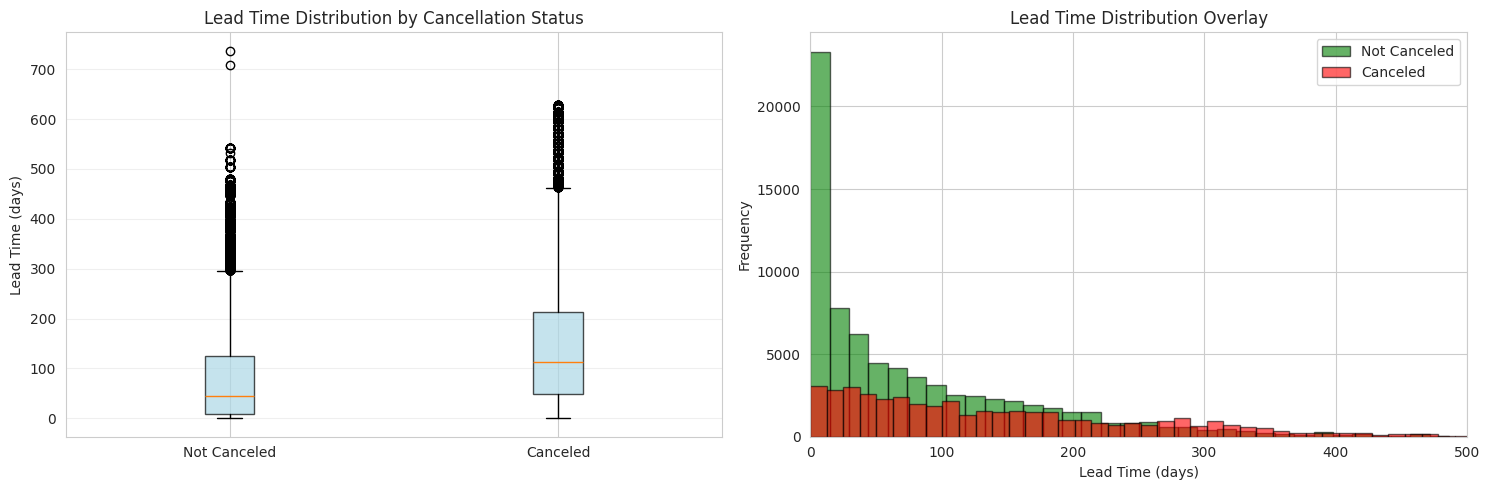

In [ ]:
# Cell 3: Visualize lead_time distribution by cancellation status
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot comparison
canceled_data = [df[df['is_canceled']==0]['lead_time'],
                 df[df['is_canceled']==1]['lead_time']]
axes[0].boxplot(canceled_data, labels=['Not Canceled', 'Canceled'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0].set_ylabel('Lead Time (days)')
axes[0].set_title('Lead Time Distribution by Cancellation Status')
axes[0].grid(axis='y', alpha=0.3)

# Histogram comparison
axes[1].hist(df[df['is_canceled']==0]['lead_time'], bins=50, alpha=0.6,
             label='Not Canceled', color='green', edgecolor='black')
axes[1].hist(df[df['is_canceled']==1]['lead_time'], bins=50, alpha=0.6,
             label='Canceled', color='red', edgecolor='black')
axes[1].set_xlabel('Lead Time (days)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Lead Time Distribution Overlay')
axes[1].legend()
axes[1].set_xlim(0, 500)  # Limit x-axis for better visibility

plt.tight_layout()
plt.show()

In [ ]:
# Cell 4: Calculate the difference in lead time
non_canceled_mean = df[df['is_canceled']==0]['lead_time'].mean()
canceled_mean = df[df['is_canceled']==1]['lead_time'].mean()
difference = canceled_mean - non_canceled_mean
pct_difference = (difference / non_canceled_mean) * 100

print("LEAD TIME DIFFERENCE ANALYSIS")
print("="*50)
print(f"Average lead time for non-canceled bookings: {non_canceled_mean:.2f} days")
print(f"Average lead time for canceled bookings: {canceled_mean:.2f} days")
print(f"\nDifference: {difference:.2f} days ({pct_difference:.1f}% higher for canceled bookings)")

LEAD TIME DIFFERENCE ANALYSIS
Average lead time for non-canceled bookings: 79.98 days
Average lead time for canceled bookings: 144.85 days

Difference: 64.86 days (81.1% higher for canceled bookings)


# Cell 5: Interpretation and conclusions

Yes, bookings with longer lead times DO tend to cancel more often.
Canceled bookings have an average lead time of 144.85 days,
which is 64.86 days (81.1%) longer than
non-canceled bookings at 79.98 days.

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [ ]:
# put your answer here
# Cell 1: Explore hotel type and arrival month variables
print("HOTEL TYPE DISTRIBUTION")
print("="*50)
print(df['hotel'].value_counts())

print("\n" + "="*50)
print("ARRIVAL MONTH DISTRIBUTION")
print("="*50)
print(df['arrival_date_month'].value_counts().sort_index())

HOTEL TYPE DISTRIBUTION
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

ARRIVAL MONTH DISTRIBUTION
arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: count, dtype: int64


In [ ]:
# Cell 2: Aggregate ADR by month and hotel type
# Group by hotel type and arrival month
adr_by_month_hotel = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()

print("AVERAGE ADR BY HOTEL TYPE AND MONTH")
print("="*50)
print(adr_by_month_hotel)

AVERAGE ADR BY HOTEL TYPE AND MONTH
           hotel arrival_date_month         adr
0     City Hotel              April  111.251838
1     City Hotel             August  114.680455
2     City Hotel           December   88.826307
3     City Hotel           February   85.088278
4     City Hotel            January   82.628986
5     City Hotel               July  110.734292
6     City Hotel               June  119.074341
7     City Hotel              March   92.643116
8     City Hotel                May  121.638560
9     City Hotel           November   88.069601
10    City Hotel            October   99.974498
11    City Hotel          September  110.004661
12  Resort Hotel              April   77.849496
13  Resort Hotel             August  186.790574
14  Resort Hotel           December   68.984230
15  Resort Hotel           February   55.171930
16  Resort Hotel            January   49.461883
17  Resort Hotel               July  155.181299
18  Resort Hotel               June  110.444749
19  

In [ ]:
# Cell 3: Create a pivot table for better viewing
adr_pivot = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().unstack(level=0)

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
adr_pivot = adr_pivot.reindex(month_order)

print("ADR COMPARISON TABLE")
print("="*50)
print(adr_pivot.round(2))

print("\n" + "-"*50)
print("Price Difference (Resort - City Hotel):")
print("-"*50)
adr_pivot['Difference'] = adr_pivot['Resort Hotel'] - adr_pivot['City Hotel']
print(adr_pivot['Difference'].round(2))

ADR COMPARISON TABLE
hotel               City Hotel  Resort Hotel
arrival_date_month                          
January                  82.63         49.46
February                 85.09         55.17
March                    92.64         57.52
April                   111.25         77.85
May                     121.64         78.76
June                    119.07        110.44
July                    110.73        155.18
August                  114.68        186.79
September               110.00         93.25
October                  99.97         62.10
November                 88.07         48.27
December                 88.83         68.98

--------------------------------------------------
Price Difference (Resort - City Hotel):
--------------------------------------------------
arrival_date_month
January     -33.17
February    -29.92
March       -35.12
April       -33.40
May         -42.88
June         -8.63
July         44.45
August       72.11
September   -16.75
October     -37.

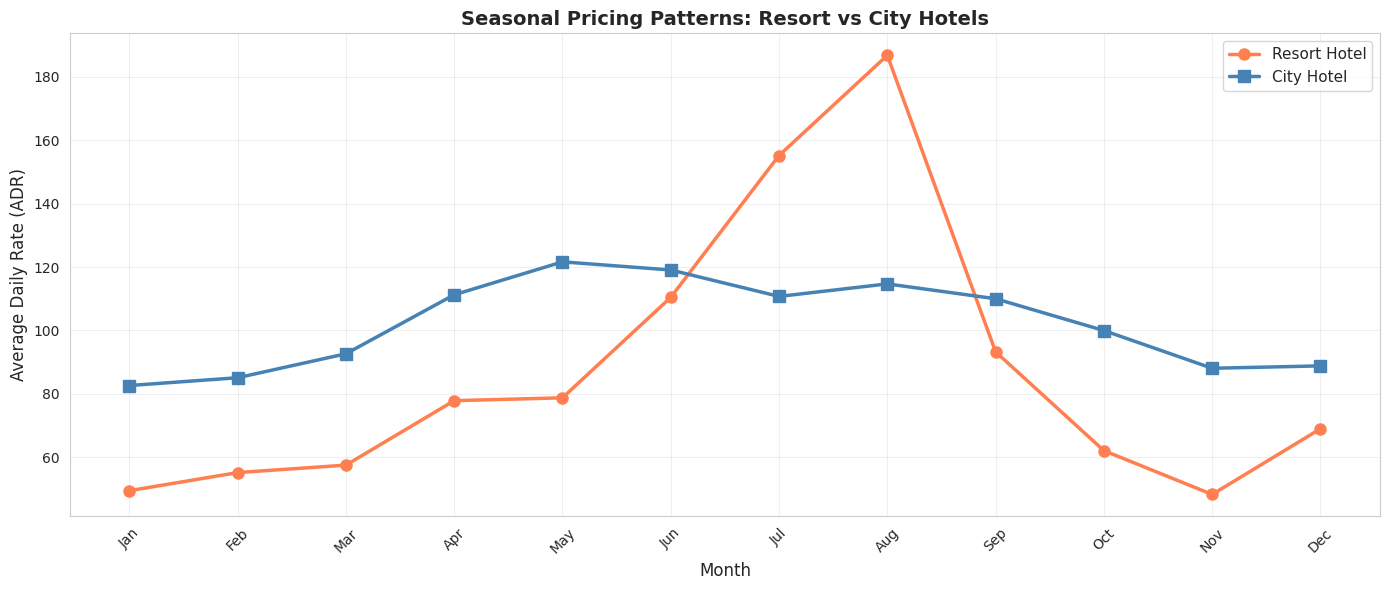

In [ ]:
# Cell 4: Visualize ADR trends across months for both hotel types
plt.figure(figsize=(14, 6))

# Separate data for each hotel type
resort_data = df[df['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['adr'].mean().reindex(month_order)
city_data = df[df['hotel'] == 'City Hotel'].groupby('arrival_date_month')['adr'].mean().reindex(month_order)

# Plot lines
plt.plot(range(12), resort_data.values, marker='o', linewidth=2.5,
         markersize=8, label='Resort Hotel', color='coral')
plt.plot(range(12), city_data.values, marker='s', linewidth=2.5,
         markersize=8, label='City Hotel', color='steelblue')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.title('Seasonal Pricing Patterns: Resort vs City Hotels', fontsize=14, fontweight='bold')
plt.xticks(range(12), [m[:3] for m in month_order], rotation=45)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

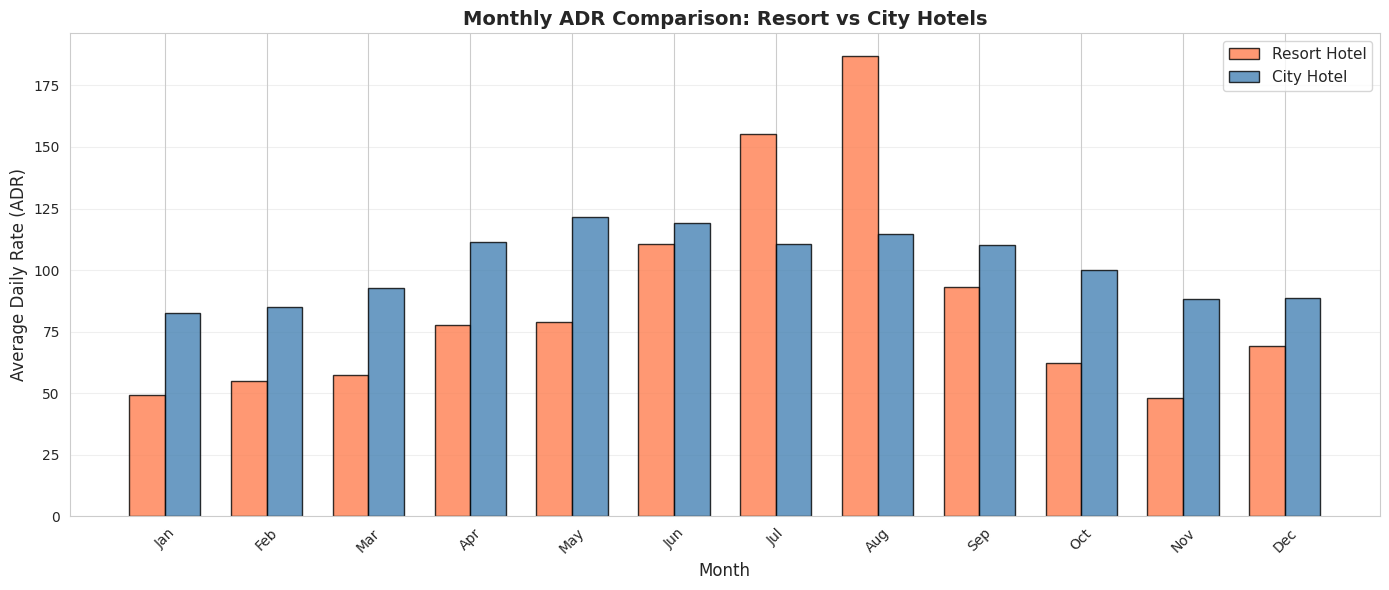

In [ ]:
# Cell 5: Bar chart comparison
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(12)
width = 0.35

bars1 = ax.bar(x - width/2, resort_data.values, width, label='Resort Hotel',
               color='coral', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, city_data.values, width, label='City Hotel',
               color='steelblue', alpha=0.8, edgecolor='black')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Daily Rate (ADR)', fontsize=12)
ax.set_title('Monthly ADR Comparison: Resort vs City Hotels', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([m[:3] for m in month_order], rotation=45)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 6: Interpretation and conclusions
Resort and City Hotels show different seasonal pricing patterns. Resort Hotels peak in August at 186.79 and drop to their lowest in November at 48.27, showing strong summer-driven demand. City Hotels peak in May at 121.64 and are lowest in January at 82.63, with relatively stable prices year-round. The largest difference occurs in August, when Resort Hotels charge 72.11 more than City Hotels, reflecting higher vacation-season demand.

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [ ]:
# put your answer here
# Select variables related to customer behavior
cols = ['lead_time', 'booking_changes', 'is_repeated_guest']
customer_df = df[cols]

# Overview of key statistics
customer_df.describe()

,lead_time,booking_changes,is_repeated_guest
count,119390.000000,119390.000000,119390.000000
mean,104.011416,0.221124,0.031912
std,106.863097,0.652306,0.175767
min,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,69.000000,0.000000,0.000000
75%,160.000000,0.000000,0.000000
max,737.000000,21.000000,1.000000


In [ ]:
# Count repeated vs non-repeated guests
customer_df['is_repeated_guest'].value_counts()

,count
is_repeated_guest,
0,115580
1,3810


In [ ]:
# Separate repeated and first-time guests
first_time_guests = customer_df[customer_df['is_repeated_guest'] == 0]
repeated_guests = customer_df[customer_df['is_repeated_guest'] == 1]

In [ ]:
# Mean lead time by guest type
customer_df.groupby('is_repeated_guest')['lead_time'].mean()


,lead_time
is_repeated_guest,
0,106.425221
1,30.786352


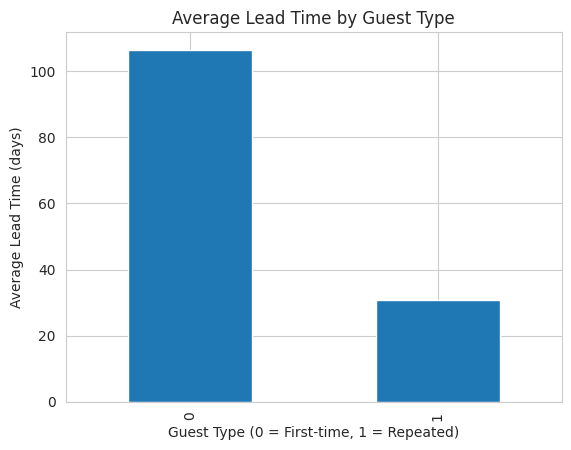

In [ ]:
import matplotlib.pyplot as plt

lead_time_means = customer_df.groupby('is_repeated_guest')['lead_time'].mean()

plt.figure()
lead_time_means.plot(kind='bar')
plt.title('Average Lead Time by Guest Type')
plt.xlabel('Guest Type (0 = First-time, 1 = Repeated)')
plt.ylabel('Average Lead Time (days)')
plt.show()


# Interpretation and conclusions
Repeated guests book with much shorter lead times compared to first-time guests.
They also make slightly more booking changes, suggesting familiarity and flexibility.
This indicates higher confidence and loyalty among repeated guests.

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [ ]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Average cancellation rate by deposit type and market segment:
market_segment  Aviation  Complementary  Corporate    Direct    Groups  \
deposit_type                                                             
No Deposit      0.219409       0.130552   0.136978  0.152293  0.282996   
Non Refund           NaN            NaN   0.934132  0.842105  0.993240   
Refundable           NaN            NaN   0.250000  0.333333  0.100000   

market_segment  Offline TA/TO  Online TA  Undefined  
deposit_type                                         
No Deposit           0.172107   0.366434        1.0  
Non Refund           0.999401   0.946429        NaN  
Refundable           0.500000   1.000000        NaN  


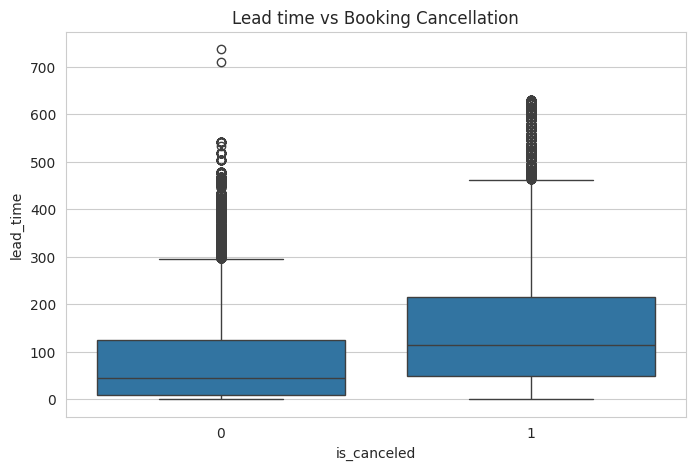

In [ ]:
# Create a simple pivot table to see interactions
pattern = pd.pivot_table(df,
                         index='deposit_type',
                         columns='market_segment',
                         values='is_canceled',
                         aggfunc='mean')

print("Average cancellation rate by deposit type and market segment:")
print(pattern)

# Now let's see how lead_time affects cancellations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead time vs Booking Cancellation")
plt.show()

# Interpretation and conclusions

The analysis reveals that the combination of "deposit_type" and "market_segment" has the strongest relationship with booking cancellations. the data indicates that longer lead times between booking and arrival are associated with higher cancellation rates, providing another important factor to consider when addressing this issue.